In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [12]:
data=pd.read_csv("StudentsPerformance.csv")

missing =data.isnull().sum() *100/ data.shape[0]

In [13]:
type(missing)

pandas.core.series.Series

<Axes: >

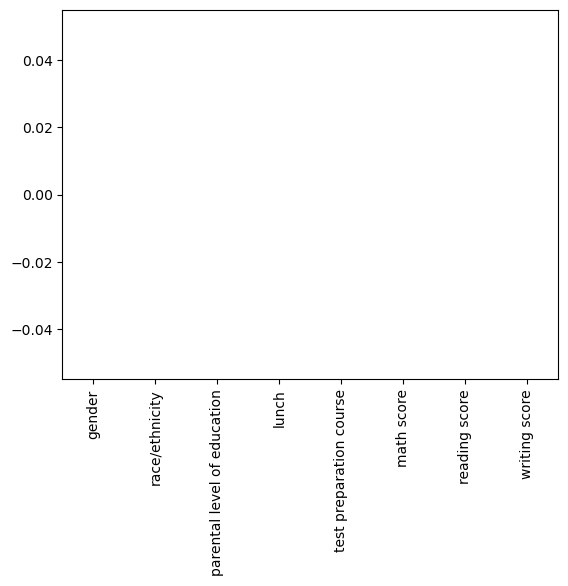

In [14]:
missing.plot(kind="bar")


In [30]:
data.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,bachelor's degree,1,1,72,72,74
1,0,2,some college,1,0,69,90,88
2,0,1,master's degree,1,1,90,95,93
3,1,0,associate's degree,0,1,47,57,44
4,1,2,some college,1,1,76,78,75


In [16]:
categoricals=[]
numericals=[]
for col in (data.columns) : 
    if data[col].dtype==np.dtype("object") : categoricals.append(col)  #np.dtype("object")=="object"
    elif data[col].dtype==np.dtype("int64") : numericals.append(col)   #np.dtype("int64")=="int64"
    else : 
        print (" *****there is a data type not in (object , int64) , check  and make it in another new list*****")

        break

In [17]:
categoricals , numericals

(['gender',
  'race/ethnicity',
  'parental level of education',
  'lunch',
  'test preparation course'],
 ['math score', 'reading score', 'writing score'])

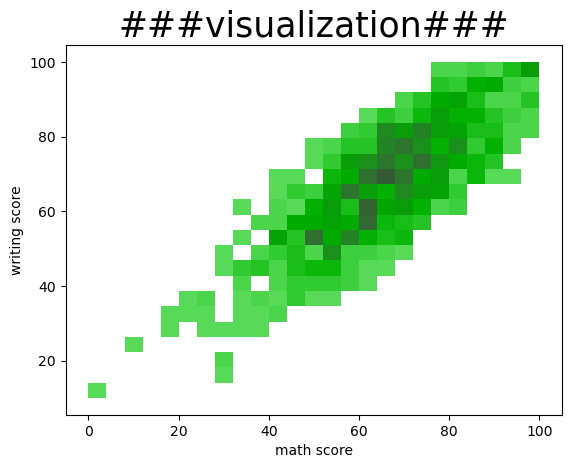

In [18]:
plt .title("###visualization###" , fontsize=25)
sns.histplot(x='math score',y='writing score',data=data , color ='lime')
plt.show()

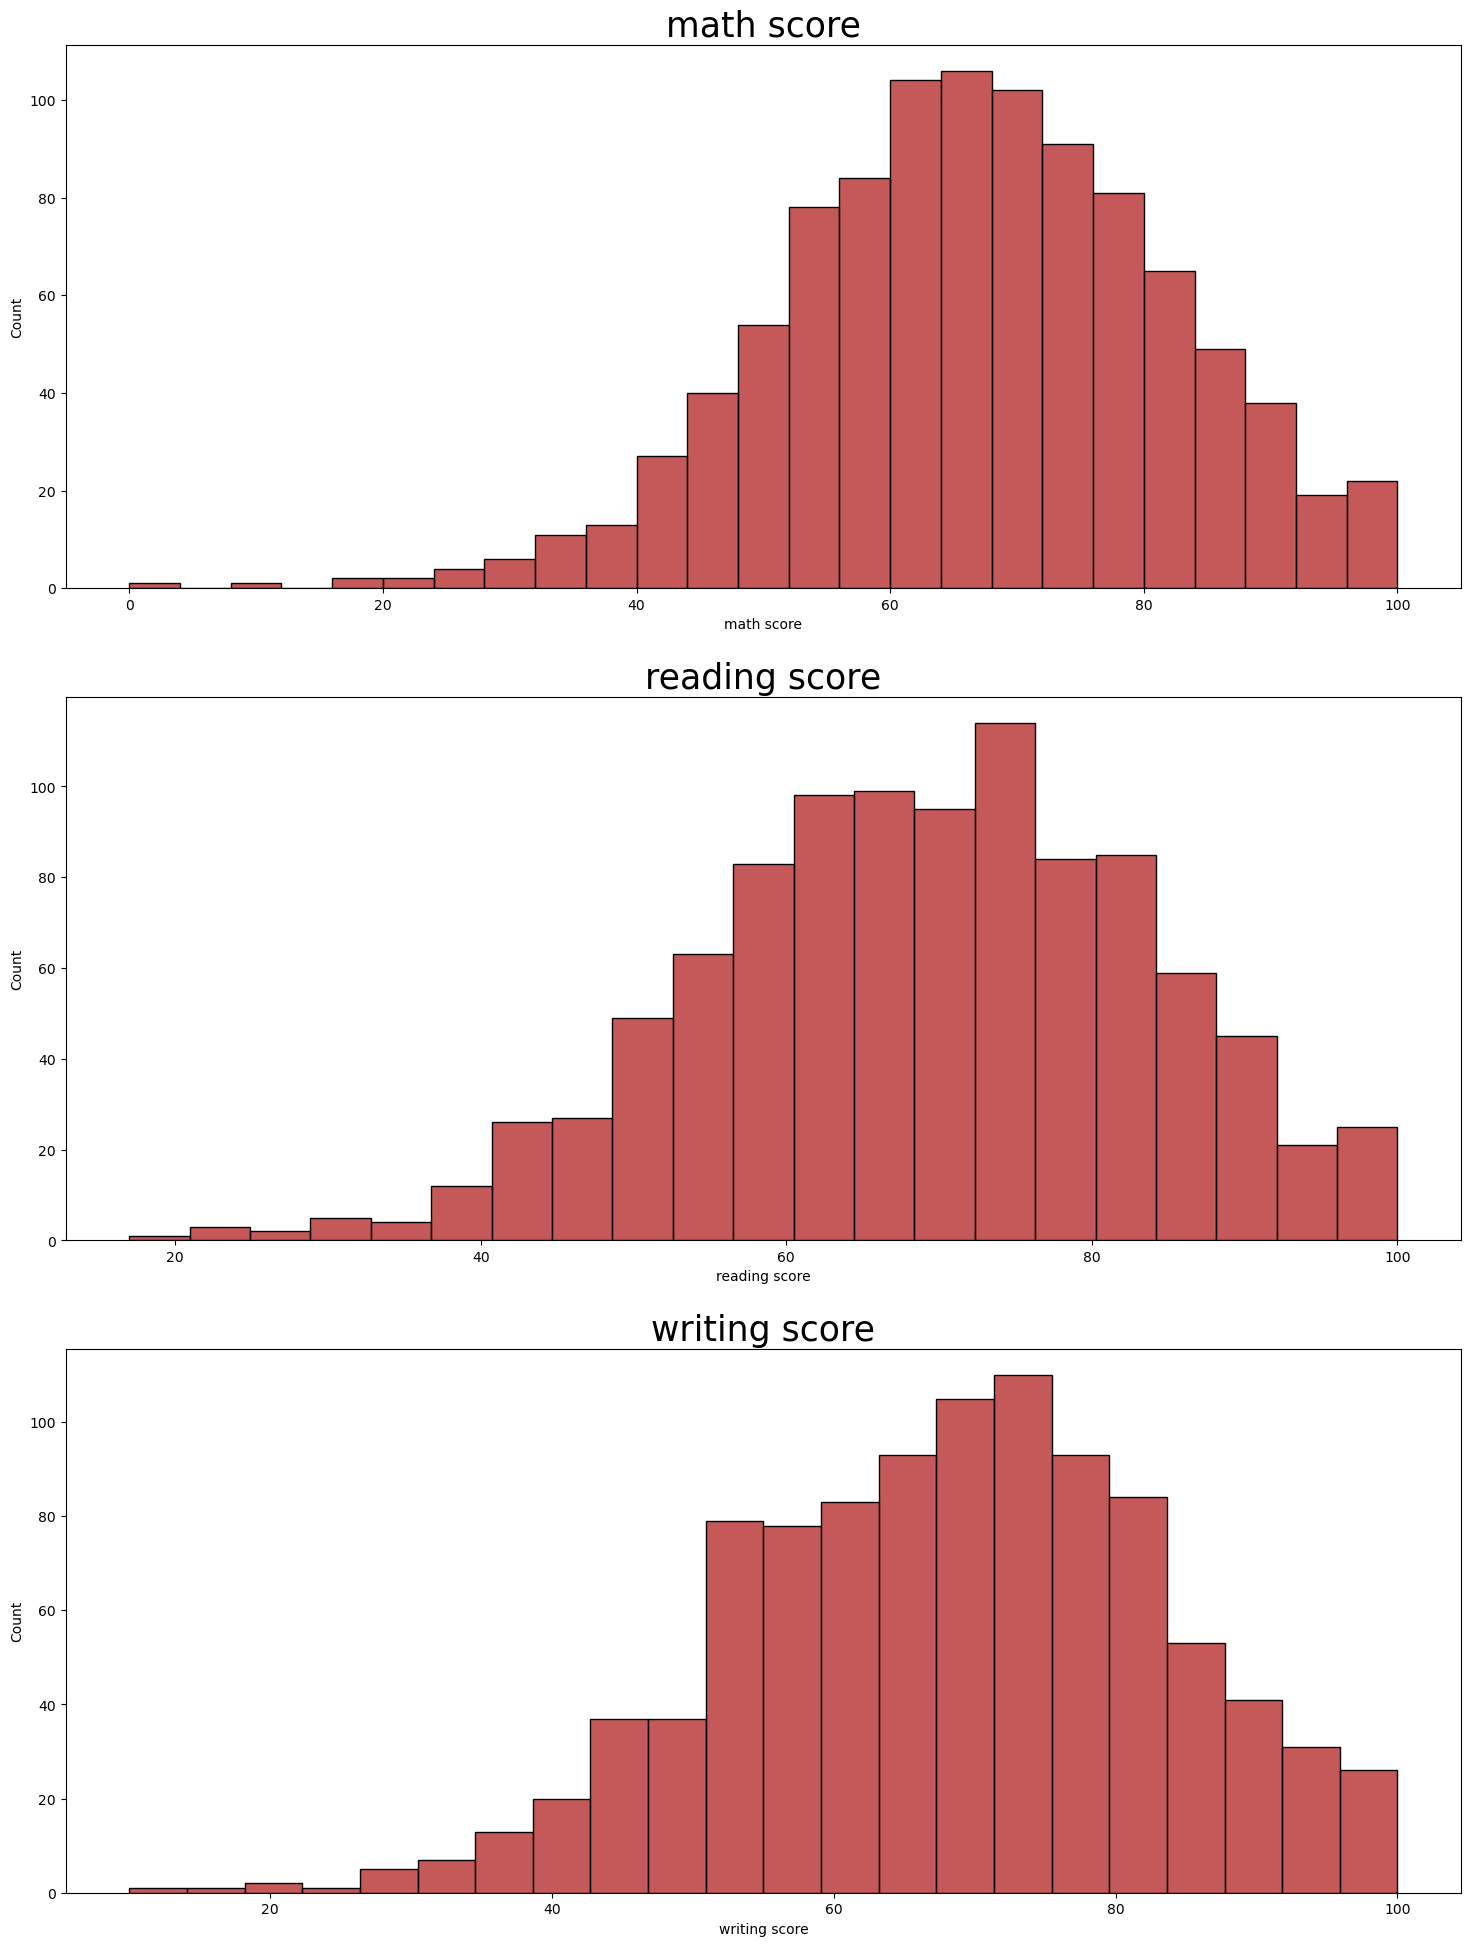

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18, 24))
for i in range(len(numericals)):
    sns.histplot(x=numericals[i], data=data, color='firebrick', ax=axes[i])  # Fixed 'hisplot' to 'histplot' and 'axe' to 'axes'
    axes[i].set_title(numericals[i], fontsize=25)

In [20]:
 #cleaning DataFrame (our data is clean by deafault XD)
for col in numericals :
    data[col].fillna(data[col].mean , inplace=True) #inplace=True  will change our data


# Encoding

In [50]:
from sklearn.preprocessing import LabelEncoder
#LabelEncoder is a tool from scikit-learn used to convert categorical text labels into numbers.

enc = LabelEncoder()

In [59]:
for col in categoricals : 
    #if col!='parental level of education':
        data[col]=enc.fit_transform(data[col])

In [60]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [55]:
encoded_value = data.loc[2, 'parental level of education']
print (encoded_value)

3


# Relationshpis between Features

<Axes: xlabel='reading score', ylabel='writing score'>

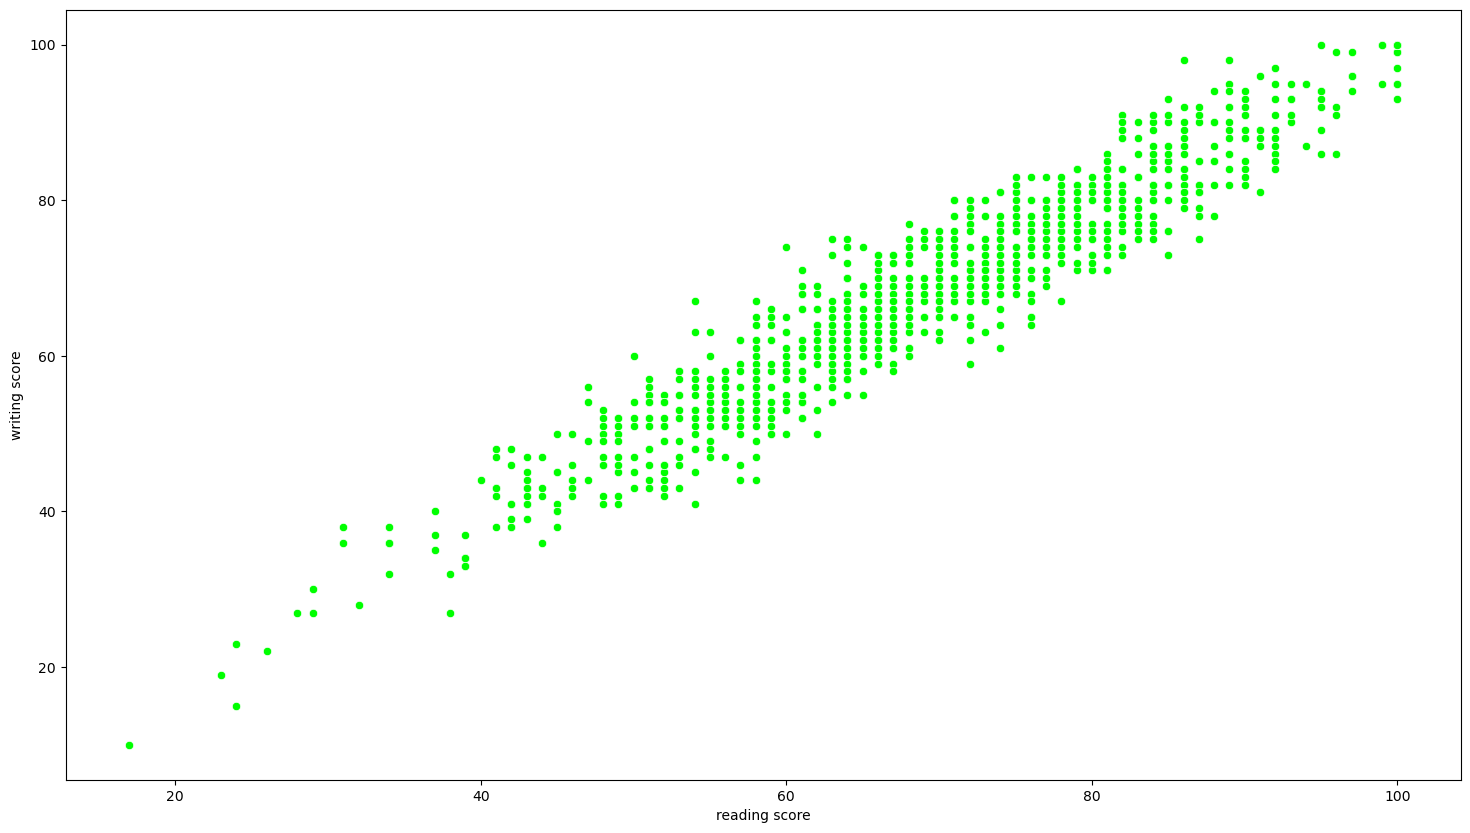

In [66]:
plt .figure(figsize=(18,10))
sns.scatterplot(x="reading score" , y='writing score' , data=data , color ='lime')

In [67]:
data.loc[: , numericals].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


.corr() : methode to calculate correlation betwen columns in DataFrame                                                                
                        (values : 0 -> 1 )
            no linear relation  __|    |__perfect relation (linear curve)

<Axes: >

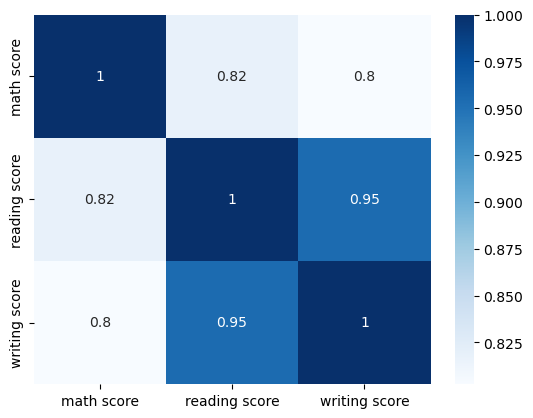

In [71]:
sns.heatmap(data.loc[: , numericals].corr() , annot=True , cmap='Blues')